In [10]:
import pint
import numpy as np
from sympy import symbols, solve, Eq

ureg = pint.get_application_registry()
Q_ = ureg.Quantity
epsilon_0 = Q_(8.85e-12, 'C^2/(N * m^2)')
k_value = 1 / (4 * 3.14159 * epsilon_0)  # Coulomb's constant
q_electron = Q_(-1.602e-19, 'C')
q_proton = - q_electron
avogadro_number = Q_(6.022e23, '1/mol')
mass_proton = Q_(1.672e-27, 'kg')
mass_electron = Q_(9.109e-31, 'kg')

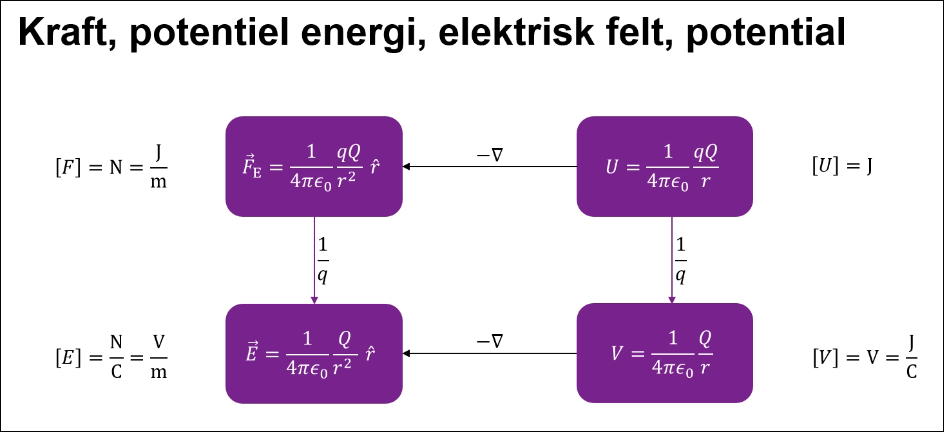

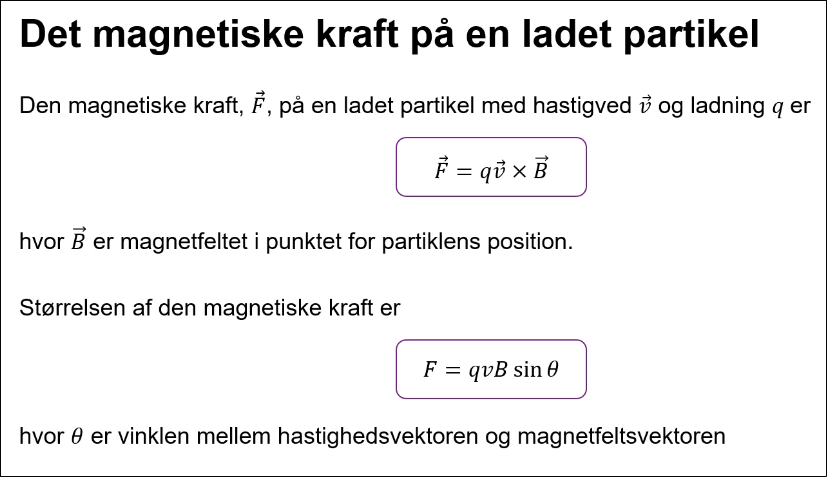

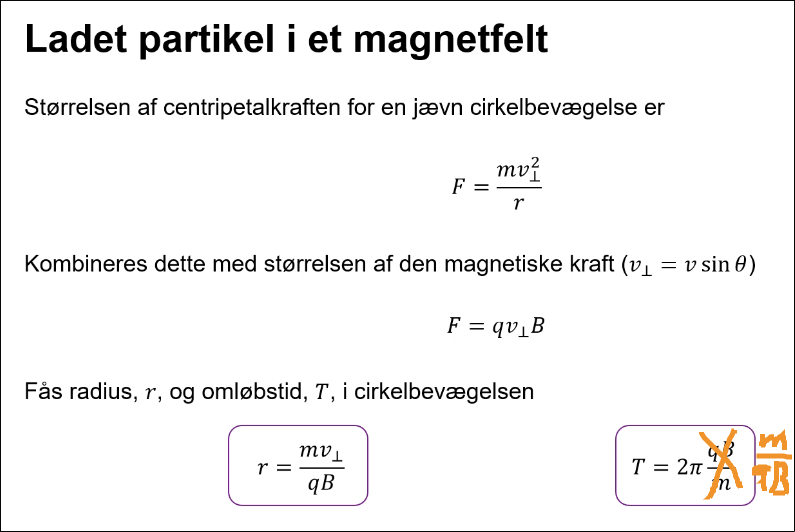

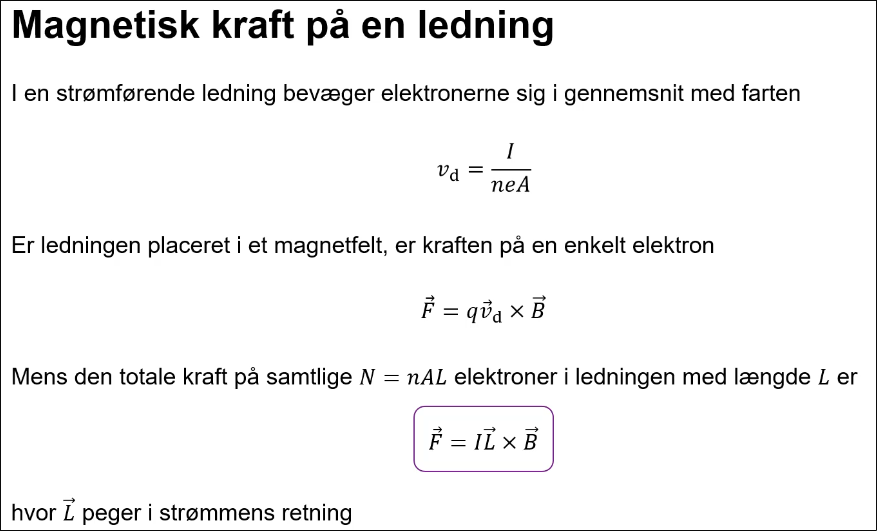

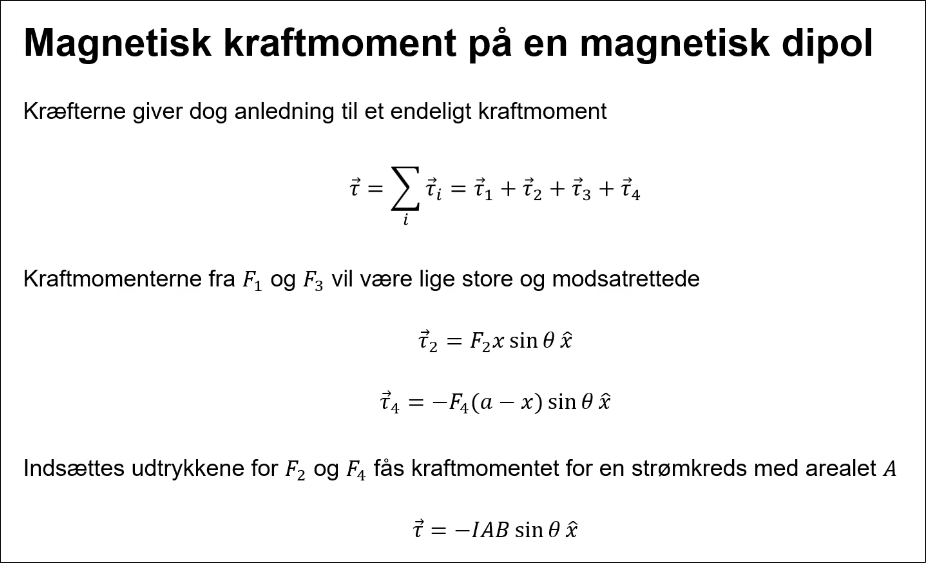

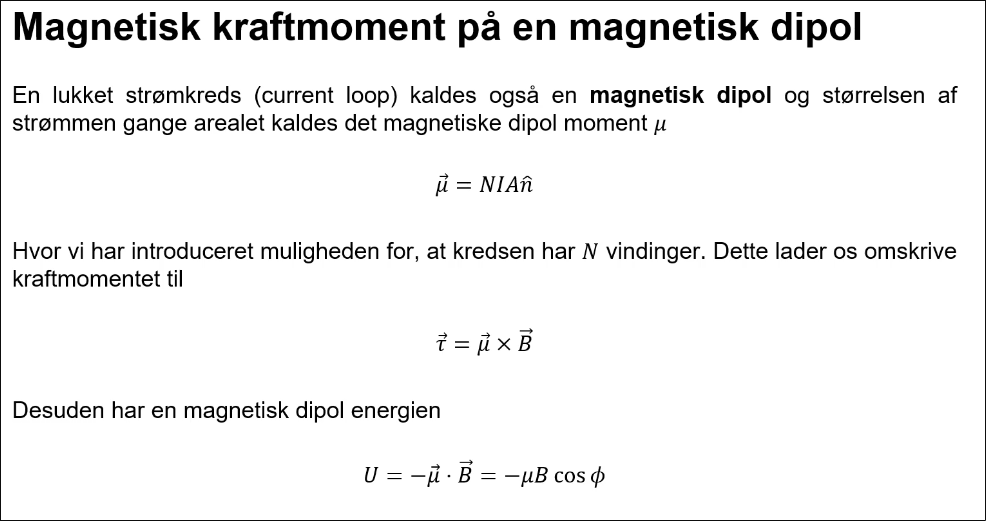

# Exercise 1
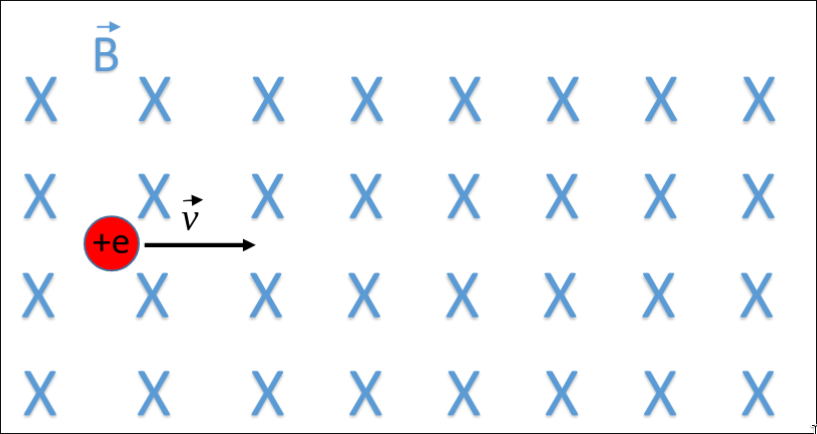

A proton moves to the right in a homogeneous magnetic field that points into the plane as shown
in the figure. The proton is not affected by forces other than the magnetic one. Which of the
following statements are correct at the instant shown in the figure?

A) The proton's acceleration is directed upwards

B) The proton's acceleration is directed downwards

C) The proton's acceleration is directed into the plane

D) The proton's acceleration is directed out of the plane

E) The acceleration of the proton is zero

F) The kinetic energy of the proton increases

G) The kinetic energy of the proton decreases

H) The kinetic energy of the proton does not change

I) Don't know

#### Answer

A) True

B) False

C) False

D) False

E) False, as we are directed upwards meaning we have a upwards acceleration $F = ma$.

F) False

G) False

H) True, as we know kinetic energy is defined by $KE = 1/2 m v^2$ and as m and v is unchanged so is the kinetic energy.


# Exercise 2
In a ’synchrotron’ protons with a kinetic energy of $2.0 \cdot 10^6$ eV are held in a circular path with a
radius of 50 cm by means of a magnetic field perpendicular to the path. What is the required
magnetic field strength?

A) 0.20 T

B) 0.29 T

C) 0.41 T

D) 0.53 T

E) 0.69 T

F) Don’t know

#### Answer
To solve this question we will use the formular 
$$
F = \frac{mv_{\perp}^2}{r}
$$
Now what we need to do is identify what contributes this force. Which is
$$
F = qv_{\perp}B
$$
we now have that
$$
\frac{mv_{\perp}^2}{r} = qv_{\perp}B
$$
where B is the magnetic field strength

In [11]:
m, v, r, q, B = symbols("m v r q b")
eq = Eq((m * v**2)/r, q * v * B)
solve(eq, B)

[m*v/(q*r)]

We now know that
$$
B = \frac{m \cdot v}{q \cdot r}
$$

But what we now notice is that we don't know m and v, so we need to somehow find these values. For this we use the kinetic energy defined as
$$
KE = \frac{1}{2} m v^2
$$

The this is tho that we know the mass as we are working with a proton, so now we can do the calculation
$$
v = \sqrt{\frac{2KE}{m}}
$$

In [12]:
m = mass_proton
r = Q_(50, 'cm')
KE = Q_(2e6, 'eV')
v = np.sqrt(2 * KE / m)
B = (m * v) / (q_proton * r)

print(f"The required magnetic field is {B.to('T'):.2f}")

The required magnetic field is 0.41 tesla


# Exercise 3
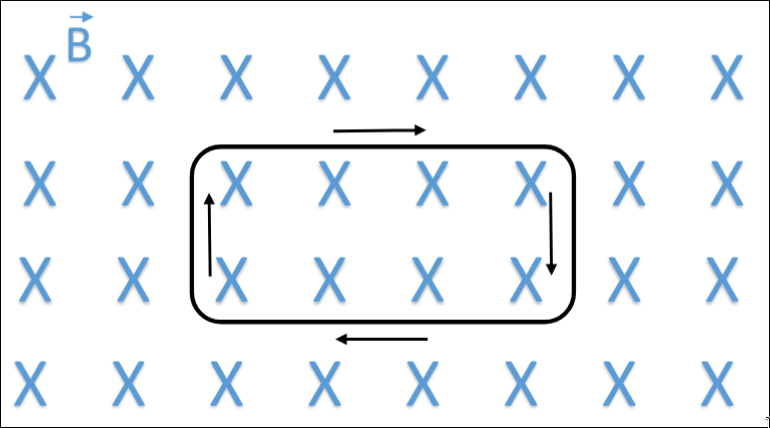

A current I =10.0 A circulates clockwise in a rectangular loop as shown in the figure. The loop is
situated in a homogeneous magnetic field of magnitude B=0.154 T pointing into the plane of the
figure. The width of the loop is denoted a=20.0 cm, and its height b=10.0 cm.

a) Calculate the magnitude and direction of the magnetic force on each of the sides of the
rectangle (ignore the forces on the rounded corners).

b) Calculate the magnetic moment of the current loop (magnitude and direction).

c) Calculate the total torque on the current loop around its center directly from the results in a). Is
the result consistent with Eq. 11.22 in the textbook?

d) Calculate the work required to turn the current loop 180 degrees around a lateral axis so that
the current flow is counterclockwise in the final state.

Hint for d): Eq. 11.23 in the textbook.

#### Answer
a)

To solve this we notice that we need to calculate the magnetude and direction of the magnetic forces.

The directions are pretty easy to solve as we can use the right hand rule, this gives us.

* Bottom: Points downwards
* Left: Points left
* Top: points upwards
* Right: points right

When dealing with a wire carrying a current (I) we use the formular
$$
F = I L \times B
$$
where L is the length vector in the current direction. What we are looking for is the magnitude, which is
$$
F = I \cdot L \cdot B \cdot \sin{\phi}
$$
As we know that the angle between the magnetic field B and any of the currents and theirby L is perpendicular to each other $\phi$ must be 90 and sin(90) = 1, so the final formular becomes
$$
F = I L B
$$

In [13]:
I = Q_(10, 'A')
B = Q_(0.154, 'T')
width = Q_(20, 'cm')
height = Q_(10, 'cm')

F_bottom = I * B * width
F_top = I * B * width
F_left = I * B * height
F_right = I * B * height

print(f"The force on the bottom side is {F_bottom.to('N'):.3f}")
print(f"The force on the top side is {F_top.to('N'):.3f}")
print(f"The force on the left side is {F_left.to('N'):.3f}")
print(f"The force on the right side is {F_right.to('N'):.3f}")
print(f"The net force on the loop is {(F_bottom + F_top + F_left + F_right).to('N'):.3f}")

The force on the bottom side is 0.308 newton
The force on the top side is 0.308 newton
The force on the left side is 0.154 newton
The force on the right side is 0.154 newton
The net force on the loop is 0.924 newton


b)

To find the magnetic moment we use the formular:
$$
\mu = NIA\hat{n}
$$
This can in our case be simplified as we don't have to think about the direction for this assignment.
$$
\mu = NIA
$$
Where:
- N = The number of turns or loops.
- I = The current, which you're given.
- A = The area of the loop.

In [14]:
N = 1 # We only have one loop
A = width * height
mu = N * I * A
print(f"The magnetic moment is {mu.to('A*m^2'):.3f}")

The magnetic moment is 0.200 ampere * meter ** 2


c)
If we remember what we concluded in a), then each force will have an opposing force meaning they cancle out. And as we see in the formular for the torgue the same is true here:
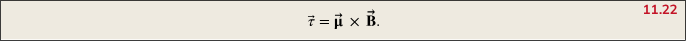

So the total torgue is 0.

Now, let's check this against the formula 

$$
\vec{\tau} = \vec{\mu} \times \vec{B}
$$

- $\vec{B}$ (Magnetic Field): As given, $\vec{B}$ points into the plane.
- $\vec{\mu}$ (Magnetic Moment): As we found in part (b), we use the right-hand rule. If you curl the fingers of your right hand in the direction of the clockwise current, your thumb points into the plane.

The Cross Product:

$\vec{\mu}$ points into the plane.

$\vec{B}$ points into the plane.

The angle ($\theta$) between $\vec{\mu}$ and $\vec{B}$ is 0°.

The magnitude of the torque is $\tau = |\vec{\mu}| |\vec{B}| \sin(\theta)$.

Since $\sin(0^\circ) = 0$, the total torque is:

$$\tau = 0$$

d)

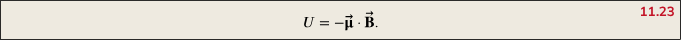

This formular becomes
$$
U = -\mu B \cos{\phi} 
$$
where we need to find
$$
\Delta U = U_{final} - U_{initial}
$$

Initally we move clockwise pointing into the plane, so the angle is 0.

Finaly we move counterclockwise pointing out of the plane, so the angle between $\mu$ (out) and B (in) becomes 180 (anti-parallel) 

In [15]:
U_initial = -mu * B * 1
U_final = -mu * B * -1
U = U_final - U_initial
print(f"The change in potential energy is {U.to('J'):.4f}")

The change in potential energy is 0.0616 joule


# Exercise 4
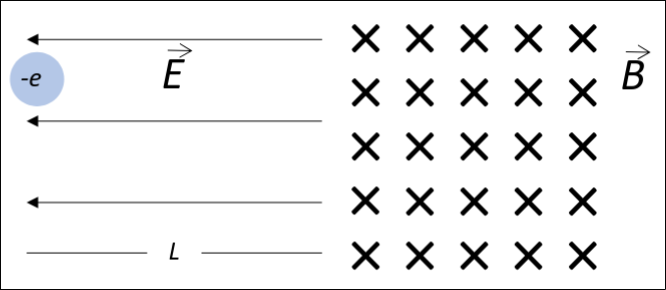

An electron is accelerated in a homogeneous electric field whose field strength is E over a
distance L as shown in the figure. Subsequently the electron moves into a homogeneous
magnetic field of strength B pointing into the plane of the figure. Let e denote the elementary
charge, and m the mass of the electron.

a) Determine the speed of the electron after its acceleration in the E-field.

b) Determine an expression for the radius R of the circular trajectory that the electron will follow
when it enters the magnetic field.

c) Determine the direction of the electrons circular movement (clockwise/counterclockwise)

#### Answer
a)

The force F on a charge q in an electric field E is given by
$$
F = qE
$$
In the assignment the charge is that of an electron, so $q = -e$ and we see that the electric field points left.
$$
F = -eE
$$
As we can see the negative sign means the force vector points in the opposite direction (right) to the electric field.

Work (W) is done when a force acts over a distance (L).
$$
W = F \cdot L
$$
where the magnitude of the force is eE, so the work done becomes
$$
W = eEL
$$

We can now apply the work energy theorem. This means that the work is converted into the electron's kinetic energy (KE), assuming it starts from rest.
$$
W = \Delta KE = \frac{1}{2}mv^2
$$
we now have
$$
eEL = \frac{1}{2}mv^2
$$

we can now solve for v

$$
v = \sqrt{\frac{2eEL}{m}}
$$

b)

We know that for it to move in a circle, the electron needs a centripetal force ($F_c$) pulling it toward the center. 
$$
F_c = \frac{mv^2}{R}
$$
This force must come from something, in our case it can be the magnetic force. 
The magnitude of the force on a charge q moving at speed v perpendicular to a magnetic field B is
$$
F_B = |q|vB \Leftrightarrow F_B = evB
$$

we now have that
$$
F_B = F_c
$$
so 
$$
\frac{mv^2}{R} = evB
$$

solve for R

$$
R = \frac{mv}{eB}
$$

c)
We use the Right-Hand Rule (but must remember to reverse the result for a negative electron).
- Velocity (v): The electron enters the field moving to the right. Point your fingers in this direction.
- Field (B): The field is into the plane. Curl your fingers in this direction.
- Force (for a positive charge): Your thumb points upwards.
- Force (for an electron): Because the electron is negative, the force is in the opposite direction. The force on the electron is downwards.

# Exercise 5
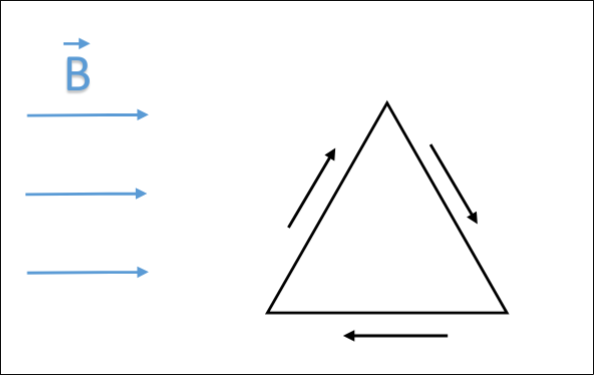

A current loop shaped like an equilateral triangle with side length a=30.0 cm is situated in a
homogeneous magnetic field of strength B=1.20 T, pointing left-to-right as shown in the figure.
The loop carries a current I=5.00 A.

a) Determine the magnitude and direction of the torque on the loop.

b) What work must be done on the loop to turn it into the orientation where its potential energy is
minimized?

#### Answer
a)

The formula for the torque $\tau$ on a current loop in a magnetic field B is given by the cross product:
$$
\tau = \mu \times B
$$
To find the magnetic moment we use the formular:
$$
\mu = NIA
$$


In [16]:
N = 1
I = Q_(5, 'A')
a = Q_(30, 'cm')
A = np.sqrt(3)/4 * a**2 # Area of an equilateral triangle
mu = N * I * A
print(f"The magnetic moment is {mu.to('A*m^2'):.3f}")

The magnetic moment is 0.195 ampere * meter ** 2


Now we just need the direction of $\mu$ which can be found to be out of the plane using the right hand rule.

Based on this we can calculate tje torque as
$$
\tau = \mu B \sin{\phi}
$$
where $\phi$ is 90 as $\mu$​ points out of the plane and $B$ points to the right.

In [17]:
B = Q_(1.2, 'T')
tau = mu * B * np.sin(np.pi/2) # phi = 90 degrees
print(f"The torque on the loop is {tau.to('N*m'):.3f}")

The torque on the loop is 0.234 meter * newton


We can now use the right hand rule again to find the direction:
- Point your thumb in the direction of μ​ (out of the plane).
- Point index finger in the direction of B (to the right).
- middle finger points upwards.

b) 

The work we must do (W) to rotate the loop is equal to the change in its potential energy (ΔU).
$$
W = \Delta U = U_{final} - U_{initial}
$$
where
$$
U = -\mu B = -\mu B \cos{\phi}
$$

We already found the angle to be 90 in the initial phase, but as $\cos{90} = 0$ we get 0J there.

The potential energy is "minimized" (most negative) when $\cos{\phi}$ is at its maximum value of +1. This happens when $\phi = 0$ So
$$
U_{final} = -\mu B
$$
Work then becomes
$$
W = -\mu B
$$

In [18]:
W = -mu * B 
print(f"The work done to rotate the loop is {W.to('J'):.3f}")

The work done to rotate the loop is -0.234 joule


# Exercise 6
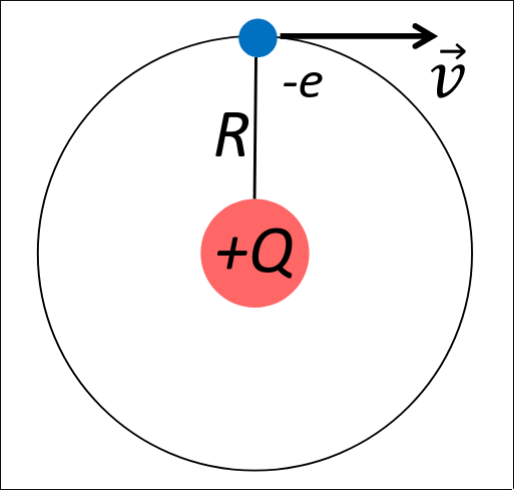

An electron is doing uniform circular movement around a spherically symmetric charge
distribution having a total charge of Q=0.1 nC as shown in the figure. The entire path of the
electron is within a uniform magnetic field of strength B perpendicular to the plane of the figure.
The speed of the electron in the circular path is $10^6$ m/s, and the radius of the path is R=0.04 m.

a) Set up expressions for the magnitude of electric and magnetic forces on the electron.

b) What will be the direction of the magnetic force if the B-field points out of, or into, the plane?
Note that the direction of circulation is given in the figure.

c) Write up Newton’s 2. law for the circular movement.

d) Solve the equation for B, and determine the strength and direction of the magnetic field

#### Answer
a) 

- Electric Force ($F_E​$): This is the attractive force between the central positive charge +Q and the negative electron −e. It's described by Coulomb's Law. The magnitude is:
$$
F_E = k_e\frac{qQ}{R^2}
$$

- Magnetic Force ($F_B​$): This is the force on the moving electron from the magnetic field. It's described by the Lorentz Force. The magnitude is:
$$
F_B = |q|vB\sin{\phi}
$$
Since the velocity v and field B is perpendicular the angle is 90, so 
$$
F_B = evB
$$


b)

Case 1: B-field
- Point thumb (v) to the right.
- Point index finger (B) out of the plane.
- Your middle finger (force on + charge) points downwards (inward).
- Force on electron is opposite: UPWARDS (outward, away from the center).

Case 2: B-field points INTO the plane
- Point thumb (v) to the right.
- Point index finger (B) into the plane.
- Your middle finger (force on + charge) points upwards (outward).
- Force on electron is opposit*e: DOWNWARDS (inward, toward the center).

c)

Newton's 2nd Law for uniform circular motion states that the net inward force must equal the centripetal force ($F_c​$) required to maintain the motion.
$$
\sum F_{inward} = F_c = \frac{mv^2}{R}
$$
The net inward force is the sum of all forces acting along the radial line (inward/outward).
- The electric force $F_E​$ is always attractive, so it's always inward.
- The magnetic force $F_B​$ is either inward or outward, as we found in part (b).

So, the general equation is:
$$
F_E \pm F_B = \frac{mv^2}{R}
$$


d)

In [20]:
m_e = mass_electron
e = -q_electron
k_e = k_value
Q = Q_(0.1, 'nC')
v = Q_(1e6, 'm/s')
R = Q_(0.04, 'm')

F_c = (m_e * v**2) / R
F_e = k_e * (e * Q) / R**2

print(f"Centripetal Force: {F_c.to('N'):.3e}")
print(f"Electric Force: {F_e.to('N'):.3e}")

Centripetal Force: 2.277e-17 newton
Electric Force: 9.003e-17 newton


The electric force $F_E​$ is stronger than the required centripetal force $F_c​$. By itself, the electric force would pull the electron into a much tighter circle.
Therefore, the magnetic force $F_B​$ must pull outward to partially cancel the electric force and keep the electron in its wide 0.04 m orbit.
From part (b), an outward force occurs when the B-field points out of the plane.

Now we use the correct force equation, with $F_E​$ (inward) and $F_B​$ (outward) opposing each other:
$$
F_E - F_B = F_c \Leftrightarrow F_B = F_E - F_c
$$

we now have
$$
evB = F_E - F_c
$$

In [23]:
evB = F_e - F_c
B = evB / (e * v)
print(f"The required magnetic field is {B.to('T'):.3e}")

The required magnetic field is 4.198e-04 tesla
